## Observations and Insights 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.count()
#mouse_metadata.head(10)




Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [51]:
study_results.head(500)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
5,h246,0,45.000000,0
6,p189,0,45.000000,0
7,n923,0,45.000000,0
8,q119,0,45.000000,0
9,f993,0,45.000000,0


In [52]:
# Combine the data into a single dataset
test_results_full = pd.merge(mouse_metadata,study_results)

# Check for duplicated values
mouseinfo = mouse_metadata['Mouse ID'].duplicated()
pd.set_option('display.max_rows',None)
mouseinfo

mouseinfo = study_results['Mouse ID'].duplicated()

#print(study_results.groupby('Mouse ID').count())
#study_results[study_results['Mouse ID']== 'a203']

In [53]:
# Checking the number of mice in the DataFrame.
import numpy as np
print(len(test_results_full['Mouse ID'].unique()))
mouse_metadata['Mouse ID'].count()
test_results_full

249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [54]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
test_results_full.duplicated(subset={'Mouse ID','Timepoint'})[test_results_full.duplicated(subset={'Mouse ID','Timepoint'})==True]

909    True
911    True
913    True
915    True
917    True
dtype: bool

In [55]:
# Getting the duplicated values and the original row
test_results_full[test_results_full.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [56]:
# Optional: Get all the data for the duplicate mouse ID. 
test_results_full.iloc[[909,911,913,915,917]]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
test_results_full_RD = test_results_full.drop_duplicates({'Mouse ID','Timepoint'})


In [58]:
# Checking the number of mice in the clean DataFrame.
len(test_results_full_RD['Mouse ID'].unique())

249

## Summary Statistics

In [59]:
summary_table = pd.DataFrame(columns=['Regimen','Mean','Median','Variance','Standard Deviation', 'SEM'])


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimends = []
mean = []
median = []
variance = []
std = []
sem = []
for regimen in test_results_full_RD['Drug Regimen'].unique():
    filtered_table = test_results_full_RD[test_results_full_RD['Drug Regimen']==regimen]
    column = filtered_table['Tumor Volume (mm3)']
    regimends.append(regimen)
    mean.append(column.mean())
    median.append(column.median())
    variance.append(column.var())
    std.append(column.std())
    sem.append(column.sem())
    # This method is the most straightforward, creating multiple series and putting them all together at the end.


summary_table['Regimen']  = regimends
summary_table['Mean']  = mean
summary_table['Median']  = median
summary_table['Variance']  = variance
summary_table['Standard Deviation']  = std
summary_table['SEM']  = sem
print(summary_table)


     Regimen       Mean     Median   Variance  Standard Deviation       SEM
0   Ramicane  40.216745  40.673236  23.486704            4.846308  0.320955
1  Capomulin  40.675741  41.557809  24.947764            4.994774  0.329346
2  Infubinol  52.884795  51.820584  43.128684            6.567243  0.492236
3    Placebo  54.033581  52.288934  61.168083            7.821003  0.581331
4   Ceftamin  52.591172  51.776157  39.290177            6.268188  0.469821
5   Stelasyn  54.233149  52.431737  59.450562            7.710419  0.573111
6  Zoniferol  53.236507  51.818479  48.533355            6.966589  0.516398
7   Ketapril  55.235638  53.698743  68.553577            8.279709  0.603860
8   Propriva  52.393463  50.909965  43.138803            6.568014  0.525862
9   Naftisol  54.331565  52.509285  66.173479            8.134708  0.596466


In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

test_results_full_RD.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg ([np.mean, np.median, np.std, np.var,st.sem])

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar Plots

['Capomulin' 'Ceftamin' 'Infubinol' 'Ketapril' 'Naftisol' 'Placebo'
 'Propriva' 'Ramicane' 'Stelasyn' 'Zoniferol']


0    25
1    24
2    22
3    21
4    17
5    16
6    15
7    14
8    14
9    14
Name: Mouse ID, dtype: int64

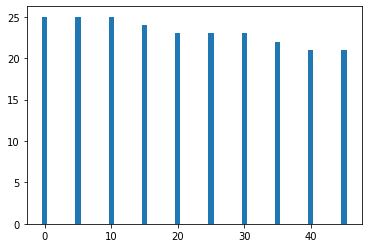

In [62]:
mousecount = test_results_full_RD.groupby(['Timepoint', 'Drug Regimen'])['Mouse ID'].count().reset_index()
plt.bar(mousecount['Timepoint'],mousecount['Mouse ID'])

Drug_Regimen = np.unique(mousecount['Drug Regimen'])
print(Drug_Regimen)


Drug_Regimen_Capomulin = mousecount[mousecount['Drug Regimen']=='Capomulin']['Mouse ID'].reset_index()['Mouse ID']
Drug_Regimen_Capomulin



Drug_Regimen_Zoniferol = mousecount[mousecount['Drug Regimen']=='Zoniferol']['Mouse ID'].reset_index()['Mouse ID']
Drug_Regimen_Zoniferol

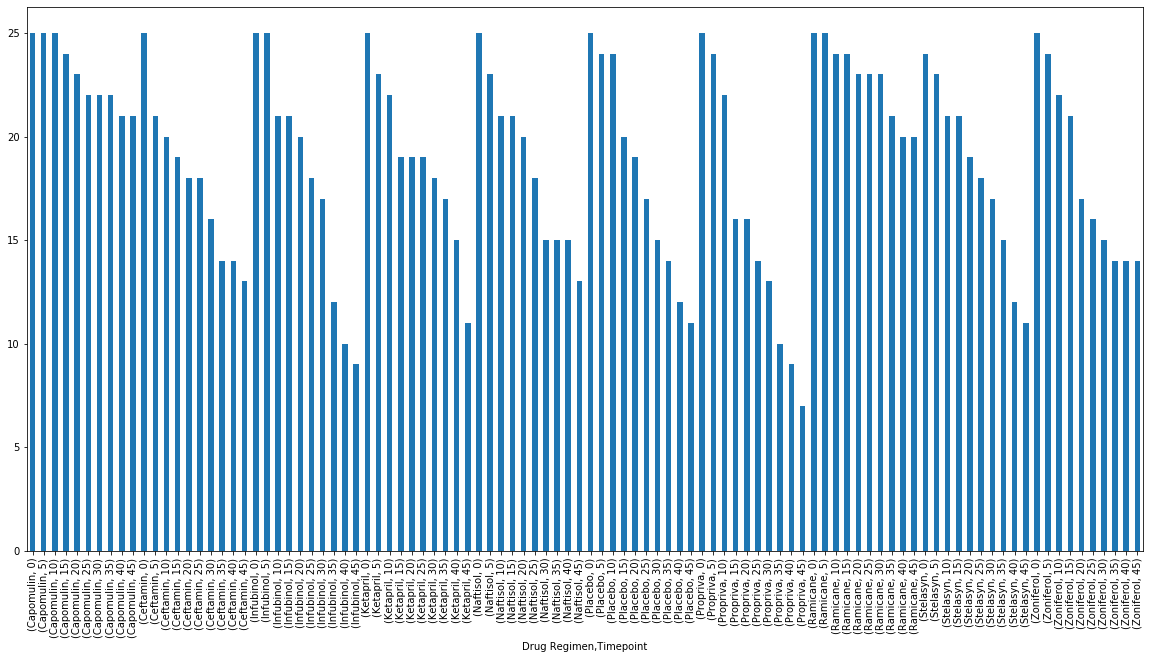

In [63]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

test_results_full_RD.groupby(['Drug Regimen','Timepoint'])['Mouse ID'].nunique().plot(kind='bar',x='Timepoint',y='Mouse Count',figsize=(20,10))

# data to plot


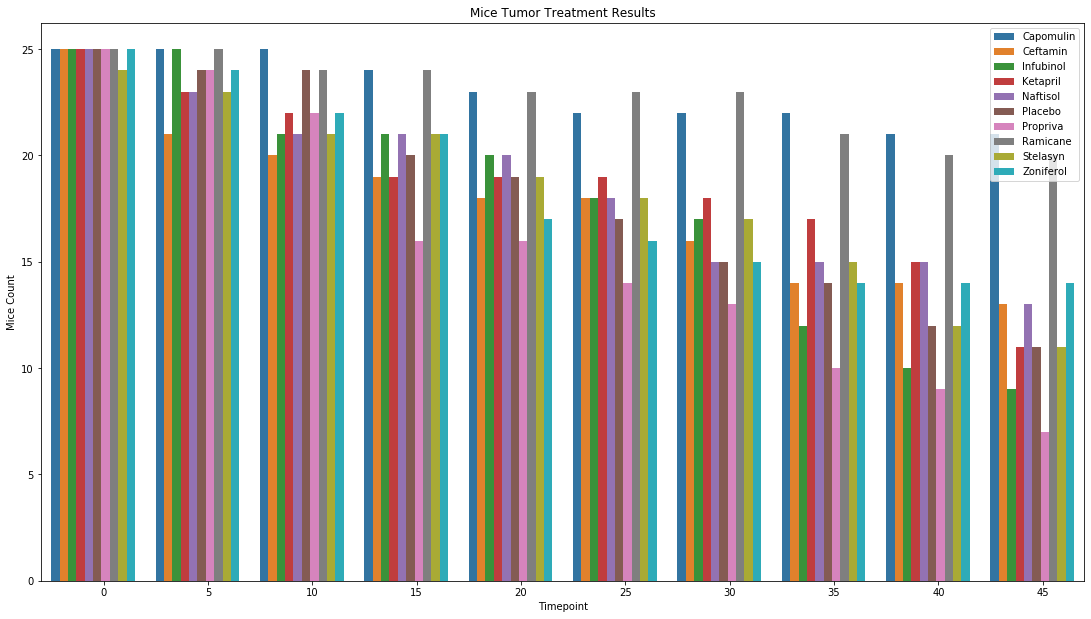

In [64]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.



# data to plot


# create plot
fig, ax = plt.subplots()
n_groups = 10
index = np.arange(n_groups)
ticks = [0,5,10,15,20,25,30,35,40,45]
bar_width = 0.10
opacity = 0.8

sms.barplot(x='Timepoint',y='Mouse ID',hue='Drug Regimen',data=mousecount,)
fig.set_size_inches(18.7, 10.27)
#fig, ax = plt.subplots()

plt.xlabel('Timepoint')
plt.ylabel('Mice Count')
plt.title('Mice Tumor Treatment Results')
plt.xticks(index + bar_width, ticks)
plt.legend()


## Pie Plots

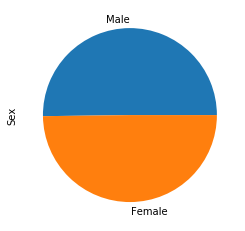

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_metadata.Sex.value_counts().plot.pie()

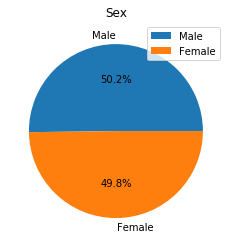

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(mouse_metadata.Sex.value_counts(),rotatelabels=False,labels=mouse_metadata.Sex.value_counts().index,autopct='%1.1f%%')

plt.title('Sex')
plt.legend(["Male", "Female"]);
plt.show()




## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
top_DrugRegimen = ['Propriva', 'Infubinol', 'Ketapril','Stelasyn']

for drug in top_DrugRegimen:
    test_results_full_RD[test_results_full_RD['Drug Regimen']==drug]

In [68]:
Regimen_dictionary = {}
for drugReg in top_DrugRegimen:
    mice_tumor = []
    for mouse in test_results_full_RD[test_results_full_RD['Drug Regimen']==drugReg]['Mouse ID'].unique():
        mice_tumor.append(list(test_results_full_RD[test_results_full_RD['Mouse ID'] == mouse]['Tumor Volume (mm3)'])[-1])
    Regimen_dictionary[top_DrugRegimen] = mice_tumor
Regimen_dictionary

TypeError: unhashable type: 'list'

In [81]:
last_volume = test_results_full_RD.groupby('Mouse ID')[['Tumor Volume (mm3)','Drug Regimen']].last()
Infubinol=last_volume[last_volume['Drug Regimen']==('Infubinol')]['Tumor Volume (mm3)']
Propriva=last_volume[last_volume['Drug Regimen']==('Propriva')]['Tumor Volume (mm3)']
Ketapril=last_volume[last_volume['Drug Regimen']==('Ketapril')]['Tumor Volume (mm3)']
Stelasyn=last_volume[last_volume['Drug Regimen']==('Stelasyn')]['Tumor Volume (mm3)']




In [82]:
# Quantitatively determine Infubinol outliers
inf_quartiles = Infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers: {Infubinol.loc[(Infubinol < inf_lower_bound) | (Infubinol > inf_upper_bound)]}")

Infubinol potential outliers: Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [83]:
# Quantitatively determine Infubinol outliers
prop_quartiles = Propriva.quantile([.25,.5,.75])
prop_lowerq = prop_quartiles[0.25]
prop_upperq = prop_quartiles[0.75]
prop_iqr = prop_upperq-prop_lowerq
prop_lower_bound = prop_lowerq - (1.5*prop_iqr)
prop_upper_bound = prop_upperq + (1.5*prop_iqr)
print(f"Propriva potential outliers: {Propriva.loc[(Propriva< prop_lower_bound) | (Propriva > prop_upper_bound)]}")

Propriva potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [84]:
# Quantitatively determine Infubinol outliers
keta_quartiles = Ketapril.quantile([.25,.5,.75])
keta_lowerq = keta_quartiles[0.25]
keta_upperq = keta_quartiles[0.75]
keta_iqr = keta_upperq-keta_lowerq
keta_lower_bound = keta_lowerq - (1.5*keta_iqr)
keta_upper_bound = keta_upperq + (1.5*keta_iqr)
print(f"Ketapril potential outliers: {Ketapril.loc[(Ketapril< keta_lower_bound) | (Ketapril > keta_upper_bound)]}")

Ketapril potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [85]:
# Quantitatively determine Infubinol outliers
stel_quartiles = Stelasyn.quantile([.25,.5,.75])
stel_lowerq = stel_quartiles[0.25]
stel_upperq = stel_quartiles[0.75]
stel_iqr = stel_upperq-keta_lowerq
stel_lower_bound = stel_lowerq - (1.5*stel_iqr)
stel_upper_bound = stel_upperq + (1.5*stel_iqr)
print(f"Stelasyn potential outliers: {Stelasyn.loc[(Stelasyn< stel_lower_bound) | (Stelasyn > stel_upper_bound)]}")

Stelasyn potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [69]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

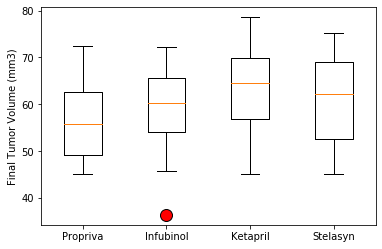

In [86]:
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([Propriva, Infubinol, Ketapril,Stelasyn],labels=['Propriva', 'Infubinol', 'Ketapril','Stelasyn'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

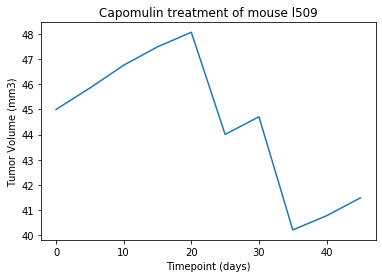

In [89]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = test_results_full_RD.loc[test_results_full_RD['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

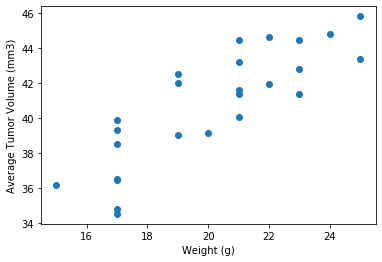

In [90]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = test_results_full_RD.loc[test_results_full_RD['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between mouse weight and the average tumor volume is 0.84


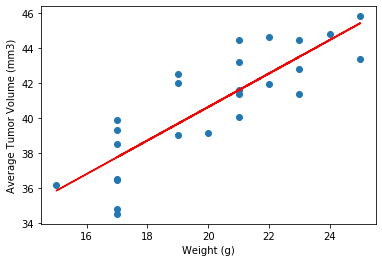

In [91]:
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()